In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('data_lab3/data_lab3v02.csv', names=['first_param', 'second_param', 'class'])
dataframe
df = dataframe
df_norm = dataframe
df_norm['first_param'] = (df['first_param'] - df['first_param'].mean())/(df['first_param'].var())
df_norm['second_param'] = (df['second_param'] - df['second_param'].mean())/(df['second_param'].var())
df_norm['class'] = df['class'] - 1
df = df_norm
df.sort_values('class')
df1 = df[df['class'] == 0]
df2 = df[df['class'] == 1]
df3 = df[df['class'] == 2]
fractions = np.array([0.6, 0.1, 0.3])

print(len(df1), len(df2), len(df3))

df1 = df1.sample(frac=1)
fractions1 = np.array([210, 35, 105])
train1, test1, val1 = np.array_split(
    df1, (fractions1[:-1].cumsum()).astype(int))

print(len(train1), len(val1), len(test1))

df2 = df2.sample(frac=1)
train2, test2, val2 = np.array_split(
    df2, (fractions[:-1].cumsum()*len(df2)).astype(int))

print(len(train2), len(val2), len(test2))

df3 = df3.sample(frac=1)
train3, test3, val3 = np.array_split(
    df3, (fractions[:-1].cumsum() * len(df3)).astype(int))

print(len(train3), len(val3), len(test3))

train = pd.concat([train1, train2, train3], ignore_index=True, axis = 0)

val = pd.concat([val1, val2, val3], ignore_index=True, axis = 0)

test = pd.concat([test1, test2, test3], ignore_index=True, axis = 0)

150 0 0
150 0 0
0 0 0
0 0 0


In [11]:
import torch
from torch import nn, optim
from torch.nn import functional as F

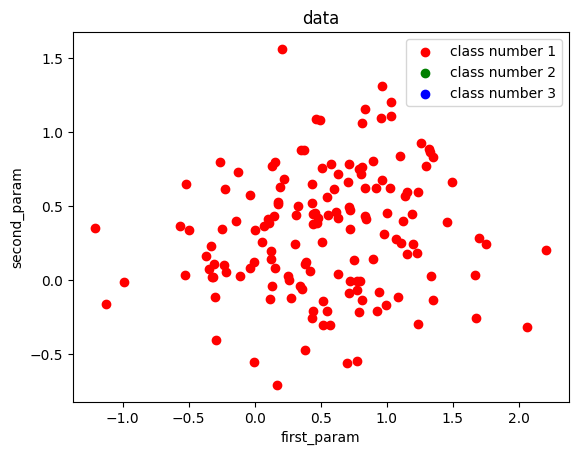

In [12]:
plt.figure()
plt.scatter(df1.first_param, df1.second_param, color = 'r', label = 'class number 1')
plt.scatter(df2.first_param, df2.second_param, color = 'g', label = 'class number 2')
plt.scatter(df3.first_param, df3.second_param, color = 'b', label = 'class number 3')
plt.xlabel('first_param')
plt.ylabel('second_param')
plt.title('data')
plt.legend()
plt.show()


In [7]:
class f_classificator(nn.Module):
  def __init__(self, n_layer_1, n_layer_2):
    super(f_classificator, self).__init__()
    self.hid1 = nn.Linear(2,n_layer_1)
    torch.nn.init.normal_(self.hid1.weight)
    self.act = torch.sigmoid
    self.hid2 = nn.Linear(n_layer_1, n_layer_2)
    torch.nn.init.normal_(self.hid2.weight)
    self.act2 = torch.sigmoid
    self.oupt = nn.Linear(n_layer_2, 3)
    self.act3 = nn.Softmax
    #self.double()
  def forward(self, x):
    x = self.act(self.hid1(x))
    x = self.act2(self.hid2(x))
    x = self.oupt(x)
    x = F.log_softmax(x, dim = 1)
    return x
class f_classificator2(nn.Module):
  def __init__(self):
    super(f_classificator, self).__init__()
    self.hid1 = nn.Linear(2, 15)
    self.hid2 = nn.Linear(15, 15)
    self.oupt = nn.Linear(15, 3)

    nn.init.xavier_uniform_(self.hid1.weight)
    nn.init.zeros_(self.hid1.bias)
    nn.init.xavier_uniform_(self.hid2.weight)
    nn.init.zeros_(self.hid2.bias)
    nn.init.xavier_uniform_(self.oupt.weight)
    nn.init.zeros_(self.oupt.bias)

  def forward(self, x):
    z = torch.sigmoid(self.hid1(x))
    z = torch.sigmoid(self.hid2(z))
    z = torch.log_softmax(self.oupt(z), dim=0)
    return z

In [8]:
def twosets(train):
  train_mas_x = [0]*len(train)
  train_mas_y = [0]*len(train)
  for i in range(len(train)):
    train_mas_x[i] = [train['first_param'][i].astype('float32'), train['second_param'][i].astype('float32')]
    train_mas_y[i] = train['class'][i].astype('float32')
  train_mas_x = np.array(train_mas_x)
  train_mas_y = np.array(train_mas_y)
  return train_mas_x, train_mas_y



train_mas_x, train_mas_y = twosets(train)
val_mas_x, val_mas_y = twosets(val)
test_mas_x, test_mas_y = twosets(test)


In [9]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self, train_mas_x, train_mas_y):
        self.x = torch.from_numpy(train_mas_x)
        self.y = torch.from_numpy(train_mas_y)
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
data_set_train = Data(train_mas_x, train_mas_y)
trainloader=DataLoader(dataset=data_set_train,batch_size=20, shuffle = True)
data_set_val = Data(val_mas_x, val_mas_y)
valloader=DataLoader(dataset=data_set_val, batch_size=len(data_set_val), shuffle = True)
data_set_test = Data(test_mas_x, test_mas_y)
testloader=DataLoader(dataset=data_set_test, batch_size=len(data_set_test), shuffle = True)
data_set_train.x.shape, data_set_train.y.shape

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
model = f_classificator(15,15)
criterion = nn.CrossEntropyLoss()
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.1)

In [ ]:

loss_list=[]
def step(trainloader):
  losses = 0
  for x, y in trainloader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y.long())
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
        losses = losses + loss
  return losses/len(trainloader)
losses = 0
def step2(train_input):
  losses=0
  for x_batch, y_batch in train_input:
      ypred = model.forward(x_batch)
      loss = criterion(ypred,y_batch.long())
      losses = losses+loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  return losses/len(train_input)
def eval_net(model, data_input, loss_function, optimizer):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for x_batch, y_batch in data_input:
      y_pred = model(x_batch)
      loss = loss_function(y_pred, y_batch.long())
      #print(y_batch, " ", y_batch.long(), "\n")
      total_loss += loss.item()
  return total_loss / len(data_input)

In [ ]:
def weights():
  f = 0
  y_train = model(torch.Tensor(train_mas_x))
  for i in range(len(y_train)):
    temp = y_train[i].detach().numpy()
    if(temp.argmax() != train_mas_y[i]):
      f = f+1
  return f
def weights1():
  f = 0
  y_train = model(torch.Tensor(val_mas_x))
  for i in range(len(y_train)):
    temp = y_train[i].detach().numpy()
    if(temp.argmax() != val_mas_y[i]):
      f = f+1
  return f
def weights2():
  f = 0
  y_train = model(torch.Tensor(test_mas_x))
  for i in range(len(y_train)):
    temp = y_train[i].detach().numpy()
    if(temp.argmax() != test_mas_y[i]):
      f = f+1
  return f

In [ ]:
weights_history_1 = np.zeros((150000, model.hid1.weight.shape[0]*2))
weights_history_2 = np.zeros((150000, model.hid2.weight.shape[0]*model.hid1.weight.shape[0]))
output_weight_history = []
train_losses, val_losses, test_losses = [], [], []
strain, sval, stest = [],[],[]
min_a = np.inf
b = 0
k = 0
while(b < 200):
    a = 0
    a = eval_net(model, valloader, criterion, optimizer)
    if(a < min_a):
      min_a = a
      b = 0
      torch.save(model.state_dict(),"super_model.pth")
    else:
      b = b+1
    train_losses.append(step2(trainloader).detach().numpy())
    val_losses.append(a)
    test_losses.append(eval_net(model, testloader, criterion, optimizer))
    weights_history_1[k] = model.hid1.weight.detach().numpy().flatten()
    weights_history_2[k] = model.hid2.weight.detach().numpy().flatten()
    output_weight_history.append(model.oupt.weight.detach().numpy().flatten().sum())
    trainloader=DataLoader(dataset=data_set_train, batch_size=20)
    strain.append(weights())
    sval.append(weights1())
    stest.append(weights2())
    #valloader=DataLoader(dataset=data_set_val, batch_size=20, shuffle = True)
    k = k+1


In [ ]:
def visualize_weights_1(net, weights_history):
    plt.figure()
    for i in range(net.hid1.weight.shape[0]):
        plt.plot(weights_history[:, i], label=f'Neuron {i + 1}')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Weights')
    plt.title(f'Neuron Weights')
    plt.show()
def visualize_weights_2(net, weights_history):
    plt.figure()
    for i in range(net.hid2.weight.shape[0]):
        plt.plot(weights_history[:, i], label=f'Neuron {i + 1}')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Weights')
    plt.title(f'Neuron Weights')
    plt.show()
def visualize_weight_output(weights_history):
    plt.figure()
    plt.plot(weights_history)
    plt.xlabel('Epoch')
    plt.ylabel('Weigths')
    plt.title(f'Output neuron weight')
    plt.show()

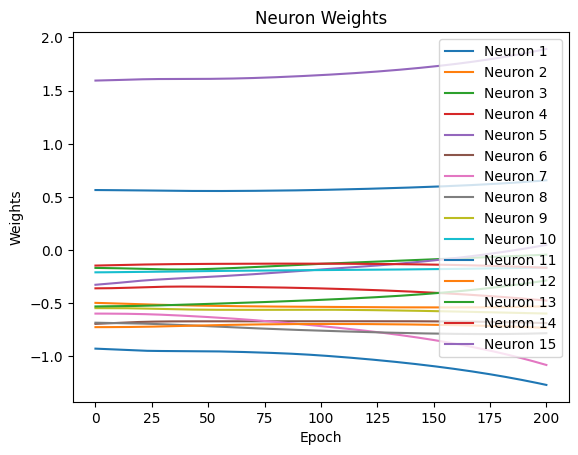

In [ ]:
weights_history_true = weights_history_1[:k]
visualize_weights_1(model, weights_history_true)

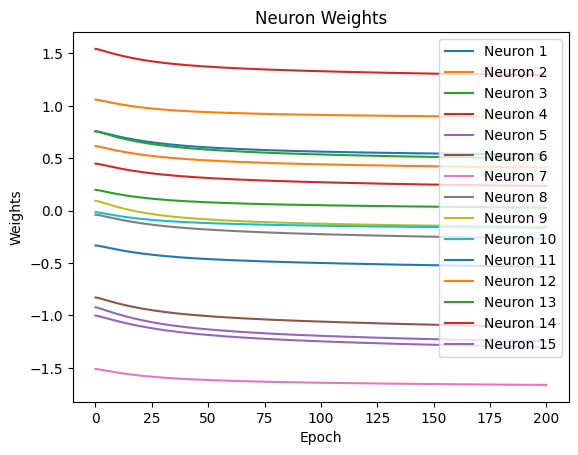

In [ ]:
weights_history_true_2 = weights_history_2[:k]
visualize_weights_2(model, weights_history_true_2)

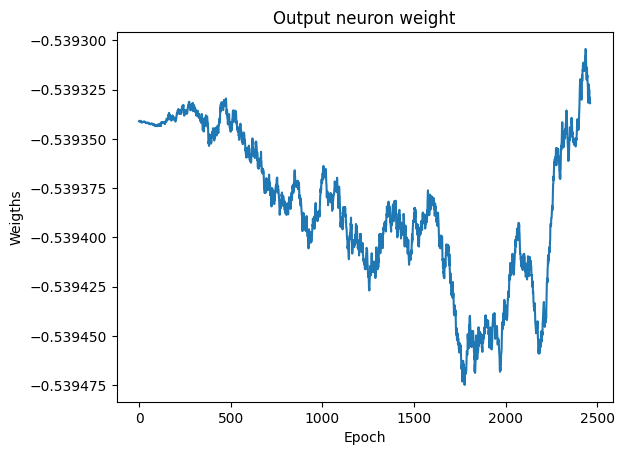

In [ ]:

visualize_weight_output(output_weight_history)

In [ ]:
from sklearn.metrics import confusion_matrix
model_e = f_classificator(15,15)
model_e.load_state_dict(torch.load("super_model.pth"))
model_e.eval()
y_train = model_e(torch.Tensor(train_mas_x))
y_val = model_e(torch.Tensor(val_mas_x))
y_test = model_e(torch.Tensor(test_mas_x))
y_test_actual = [0]*len(y_test)
for i in range(len(y_test)):
  temp = y_test[i].detach().numpy()
  y_test_actual[i] = temp.argmax()

y_train_actual = [0]*len(y_train)

for i in range(len(y_train)):
  temp = y_train[i].detach().numpy()
  y_train_actual[i] = temp.argmax()

y_val_actual = [0]*len(y_val)

for i in range(len(y_val)):
  temp = y_val[i].detach().numpy()
  y_val_actual[i] = temp.argmax()

test_mas_y_1 = test_mas_y
train_mas_y_1 = train_mas_y
val_mas_y_1 = val_mas_y
cf_matrix = confusion_matrix(test_mas_y_1, y_test_actual)
cf_matrix2 = confusion_matrix(train_mas_y_1, y_train_actual)
cf_matrix3 = confusion_matrix(val_mas_y_1, y_val_actual)
print(cf_matrix)
print(cf_matrix2)
print(cf_matrix3)

[[30  1  4]
 [ 2 18  5]
 [ 1  0 14]]
[[180  20  10]
 [ 12 124  14]
 [  0   4  86]]
[[89  8  8]
 [10 58  7]
 [ 0  1 44]]


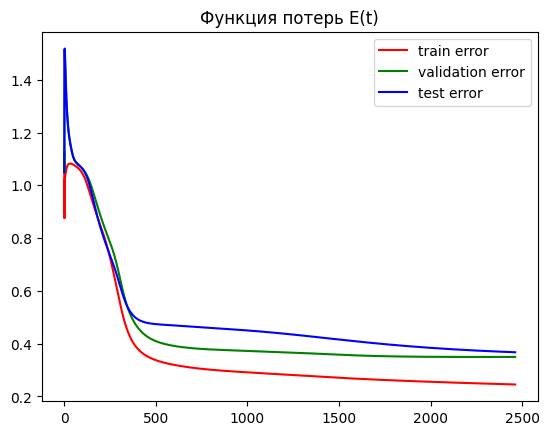

1.0670204 1.1253230571746826 1.049252986907959


In [ ]:
x = np.linspace(0,len(val_losses),len(val_losses))
plt.plot(x, train_losses, color = 'r', label = 'train error')
plt.plot(x, val_losses, color = 'g', label = 'validation error')
plt.plot(x, test_losses, color = 'b', label = "test error")
plt.title('Функция потерь E(t)')
plt.legend()
plt.show()
print(train_losses[0], val_losses[0], test_losses[0])

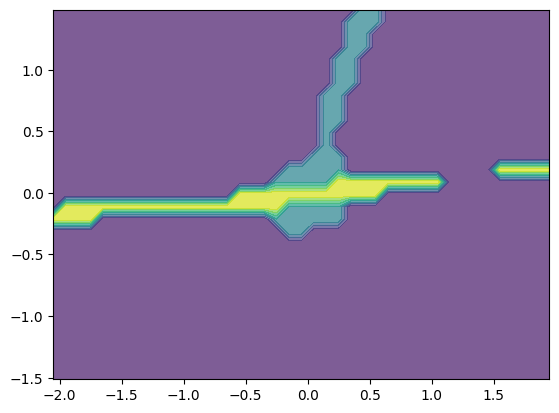

In [ ]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy().argmax(axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.7)
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor = 'k')
    plt.show()


plot_decision_boundary(train_mas_x, train_mas_y, model_e)

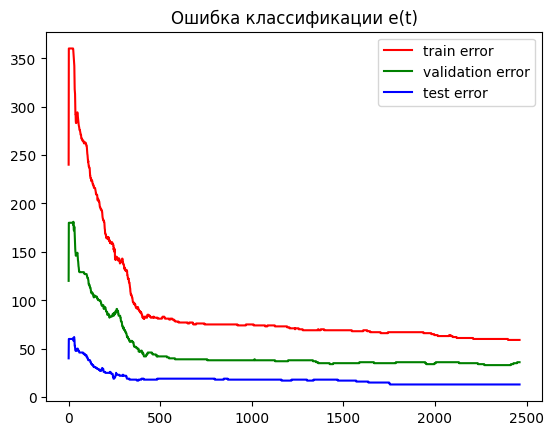

In [ ]:
x = np.linspace(0,len(val_losses),len(val_losses))
plt.plot(x, strain, color = 'r', label = 'train error')
plt.plot(x, sval, color = 'g', label = 'validation error')
plt.plot(x, stest, color = 'b', label = "test error")
plt.title('Ошибка классификации e(t)')
plt.legend()
plt.show()